# Parcial 3_5

## Punto 1

1. Resuelva el problema con valores iniciales

$$ x' = \begin{pmatrix} 1& -12&-14 \\1 &2 &-3  \\1 &1 &-2  \end{pmatrix}x, \ \ \ \ x(0) = \begin{pmatrix} 4\\6 \\-7 \end{pmatrix} $$

Es decir, determina una función $x = u(t) + v(t) + \xi e^{rt}$ de valor real que satisfaga el PVI anterior. 

   * Resuelva la ecuación polinómica de grado $3$: $det(A - rI) = 0$ utilizando el hecho de que los pilonomios de   
     coeficientes enteros de la forma 
   
   $$r^{3} + a_{2}r^{2} + a_{1}r + a_{0}$$
   
   tienen como posibles ceros racionales a los factores primos de $a_{0}$ o a los inversos aditivos de estos factores. 

2. Verifique 

3. **(Opcional)** Incluya el pantallazo de la verificación con Colaboratory o con [WolframAlpha](https://www.wolframalpha.com/input/?i=x%27+%3D+%7B%7B6%2C-1%7D%2C%7B5%2C4%7D%7Dx+)

No puede omitir ningún paso de solución y de cálculo algoritmicos y debe describir verbalmente su procedimiento y justificar los pasos esenciales. 

In [2]:
from sympy import * 
A = Matrix([[1,-12,-14],[1,2,-3],[1,1,-2]])
rv1,rv2,rv3 = A.eigenvects() 
rv2 

(-5*I,
 1,
 [Matrix([
  [1 - 5*I],
  [      1],
  [      1]])])

In [25]:
import numpy as np 
from sympy import *
t = symbols('t', real = True, nonegative = True) 
A = Matrix([[1,-12,-14],[1,2,-3],[1,1,-2]])  

r1, r2, r3 = A.eigenvects()[0][0]/A.eigenvects()[0][1], A.eigenvects()[1][0]/A.eigenvects()[1][1], A.eigenvects()[2][0]/A.eigenvects()[2][1]

v1, v2, v3 = A.eigenvects()[0][2][0],A.eigenvects()[1][2][0],A.eigenvects()[2][2][0] 
lambda1, mu1 = re(r1), im(r1)
lambda2, mu2 = re(r2), im(r2)
lambda3, mu3 = re(r3), im(r3) 

x_sup1_sympy = v1*( exp(lambda1*t)*( cos(mu1*t) + I*sin(mu1*t) ) ) 
x_sup1_lambda = lambdify( t, x_sup1_sympy ) # solución de valor real

x_sup2 = v1*( exp(lambda2*t)*(cos(mu2*t) + I*sin(mu2*t) ) ) # solución de valor complejo

u_sympy = re( x_sup2 )  
v_sympy = im( x_sup2 ) 

u_lambda = lambdify( t, re( x_sup2 ) ) 
v_lambda = lambdify( t, im( x_sup2 ) ) 

c1,c2,c3 = symbols('c1 c2 c3')

x_sympy = c1*x_sup1_sympy + c2*u_sympy + c3*v_sympy
x_lambda = lambdify(t, x_sympy , 'numpy' )

x_sympy 

Matrix([
[25*c1*exp(t)/6 + 25*c2*cos(5*t)/6 - 25*c3*sin(5*t)/6],
[  -7*c1*exp(t)/6 - 7*c2*cos(5*t)/6 + 7*c3*sin(5*t)/6],
[               c1*exp(t) + c2*cos(5*t) - c3*sin(5*t)]])

In [38]:
c1,c2,c3 = 1,1,1 
x_lambda(0)[0,0] 

4.16666666666667*c1 + 4.16666666666667*c2

In [41]:
x = lambda t: c1*x_sup1_lambda(t) + c2*u_lambda(t) + c3*v_lambda(t)

In [42]:
x(0)

array([[ 8.33333333],
       [-2.33333333],
       [ 2.        ]])

## Graficación de las funciones escalares $x_{1}(t)$, $x_{2}(t)$ y $x_{3}(t)$

$$ x = \begin{pmatrix} x_{1}(t) \\ x_{2}(t) \\ x_{3}(t) \end{pmatrix} $$


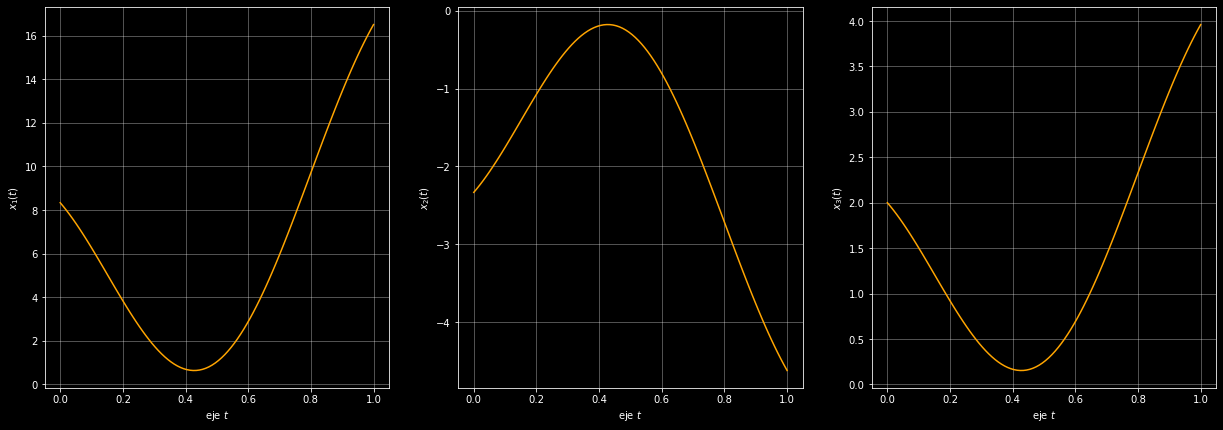

In [43]:
import numpy as np 
import matplotlib.pyplot as plt 

plt.style.use('dark_background') 

fig = plt.figure(figsize = (21,7)) 

c1,c2,c3 = 1,1,1
t = np.linspace(0,1,100)

x = lambda t: c1*x_sup1_lambda(t) + c2*u_lambda(t) + c3*v_lambda(t)

ax1 = fig.add_subplot(131)
ax1.plot(t,x(t)[0,0], color = 'orange') 
ax1.set_xlabel(r'eje $t$')
ax1.set_ylabel(r'$x_{1}(t)$')
ax1.grid(True, alpha = 0.4)


ax2 = fig.add_subplot(132)
ax2.plot(t,x(t)[1,0], color = 'orange') 
ax2.set_xlabel(r'eje $t$')
ax2.set_ylabel(r'$x_{2}(t)$')
ax2.grid(True, alpha = 0.4)


ax3 = fig.add_subplot(133) 
ax3.plot(t,x(t)[2,0], color = 'orange') 
ax3.set_xlabel(r'eje $t$')
ax3.set_ylabel(r'$x_{3}(t)$')
ax3.grid(True, alpha = 0.4)
      

## Punto 2

1. Encontrar la solución general de 

$$ x' = \begin{pmatrix}2 & 4& 4\\ -1&-2&0  \\-1 &0 &-2  \end{pmatrix}x $$

2. Verifique por sustitución directa

3. Utilice el wronkiano para mostrar que $x^{(1)}, x^{(2)}$ y $x^{(3)}$ es un conjunto fundamental de soluciones. 

No puede omitir ningún paso de solución y de cálculo algoritmicos y debe describir verbalmente su procedimiento y justificar los pasos esenciales. 

## Solución

Supongamos que la solución del sistema es de la forma $x = \xi e^{rt}$. 

In [4]:
import numpy as np 
from sympy import *
t = symbols('t') 
A = Matrix([[2,4,4],[-1,-2,0],[-1,0,-2]])  
r1,r2,r3 = A.eigenvals().keys()  # obtendrás un diccionario 
v1,v2,v3 = A.eigenvects()[0][2][0],A.eigenvects()[1][2][0],A.eigenvects()[2][2][0] 
lambda1, mu1 = re(r1),im(r1)
lambda2, mu2 = re(r2),re(r2)
lambda3, mu3 = re(r3),im(r3) 
x_sup1 = lambdify(t,v1*(exp(lambda1*t)*cos(mu1*t) + 1*I*sin(mu1*t))) 
u = lambdify(t,re(v2*(exp(lambda2*t)*cos(mu2*t) + 1*I*sin(mu2*t)))) 
v = lambdify(t,im(v2*(exp(lambda2*t)*cos(mu2*t) + 1*I*sin(mu2*t))))  
c1,c2,c3 = 1,1,1
x = lambda t:c1*x_sup1(t) + c2*u(t) + c3*v(t) 

In [5]:
from sympy import *
A = Matrix(A) 
A.eigenvects()           

[(-2,
  1,
  [Matrix([
   [ 0],
   [-1],
   [ 1]])]),
 (-2*I,
  1,
  [Matrix([
   [-2 + 2*I],
   [       1],
   [       1]])]),
 (2*I,
  1,
  [Matrix([
   [-2 - 2*I],
   [       1],
   [       1]])])]

## Punto 3

1. Resuelva 

$$ x' = \begin{pmatrix} 2&5&1\\-5&-6&4\\0&0&2\end{pmatrix}x $$

2. Verifique 

No puede omitir ningún paso de solución y de cálculo algoritmicos y debe describir verbalmente su procedimiento y justificar los pasos esenciales. 

In [ ]:
import numpy as np 
A = np.array([[2,5,1],[-5,-6,4],[0,0,2]])
np.linalg.eig(A) 

In [ ]:
from sympy import *
A = Matrix(A) 
A.eigenvects()           